 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [28]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [73]:
# Reading whale returns
whale_returns_csv = Path("../Resources/whale_returns.csv")

# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.sort_index(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [30]:
# Count nulls
# YOUR CODE HERE
print(whale_returns.isnull().mean() * 100)

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64


In [31]:
# Drop nulls
# YOUR CODE HERE
whale_data = whale_returns.dropna()
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [32]:
# Reading algorithmic returns
# YOUR CODE HERE
algo_returns_csv = Path("../Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(inplace=True)

In [33]:
# Count nulls
print(algo_returns.isnull().mean() * 100)
# YOUR CODE HERE

Algo 1    0.000000
Algo 2    0.483481
dtype: float64


In [34]:
# Drop nulls
# YOUR CODE HERE
algo_data = algo_returns.dropna()
print(algo_data.isnull().sum())

Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [35]:
# Reading S&P 500 Closing Prices
# YOUR CODE HERE
sp500_history_csv = Path("../Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date",parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(inplace=True)

In [36]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [37]:
# Fix Data Types
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close']

Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [38]:
sp500_history['Close'] = sp500_history['Close'].astype('float')

In [39]:
sp500_history.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [40]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [41]:
# Drop nulls
# YOUR CODE HERE
sp500_returns = sp500_history.pct_change().dropna()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [42]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns = ['S&P 500']
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [76]:
# Concatenate all DataFrames into a single DataFrame

# YOUR CODE HERE
# Create a new pivot table where the columns are the closing prices for each ticker
combined_returns = pd.concat([whale_returns, algo_returns,sp500_returns], axis="columns", join="inner").dropna()

# Sort datetime index in ascending order (past to present)0
combined_returns.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
combined_returns.columns = ["SOROS FUND MANAGEMENT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P 500"]

# Display a few rows
combined_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

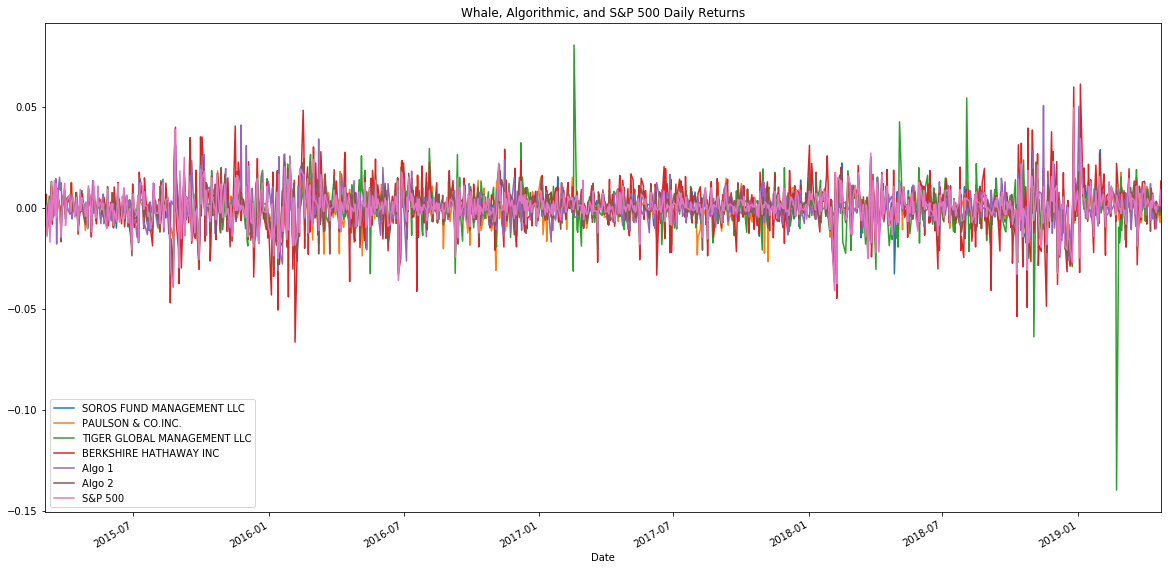

In [44]:
# Plot daily returns
# YOUR CODE HERE
combined_returns.plot(figsize=(20, 10), title='Whale, Algorithmic, and S&P 500 Daily Returns')

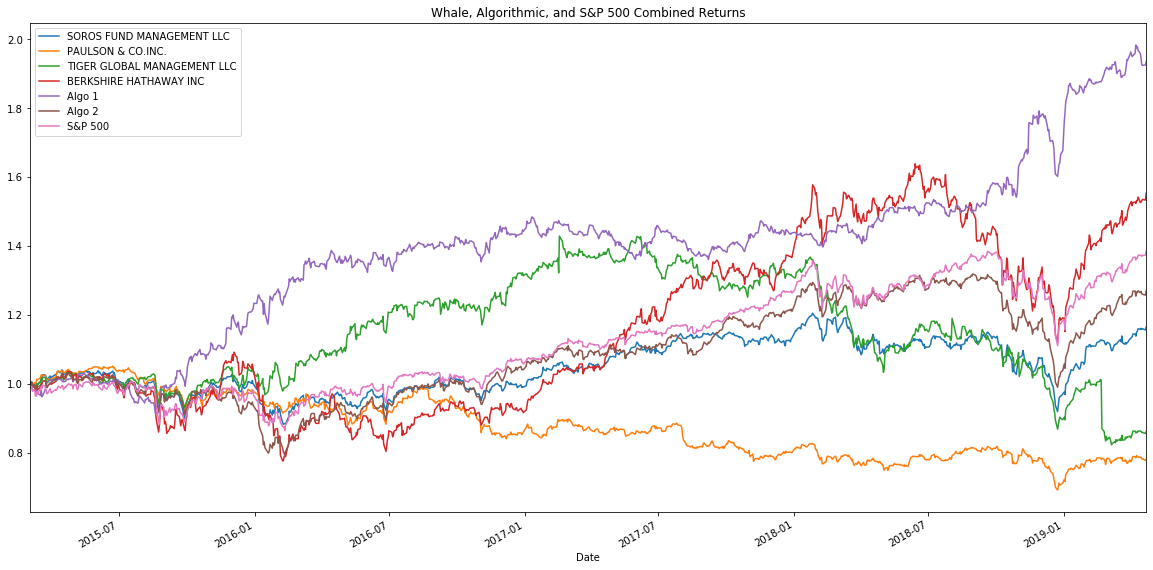

In [77]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.plot(figsize=(20, 10), title='Whale, Algorithmic, and S&P 500 Combined Returns')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

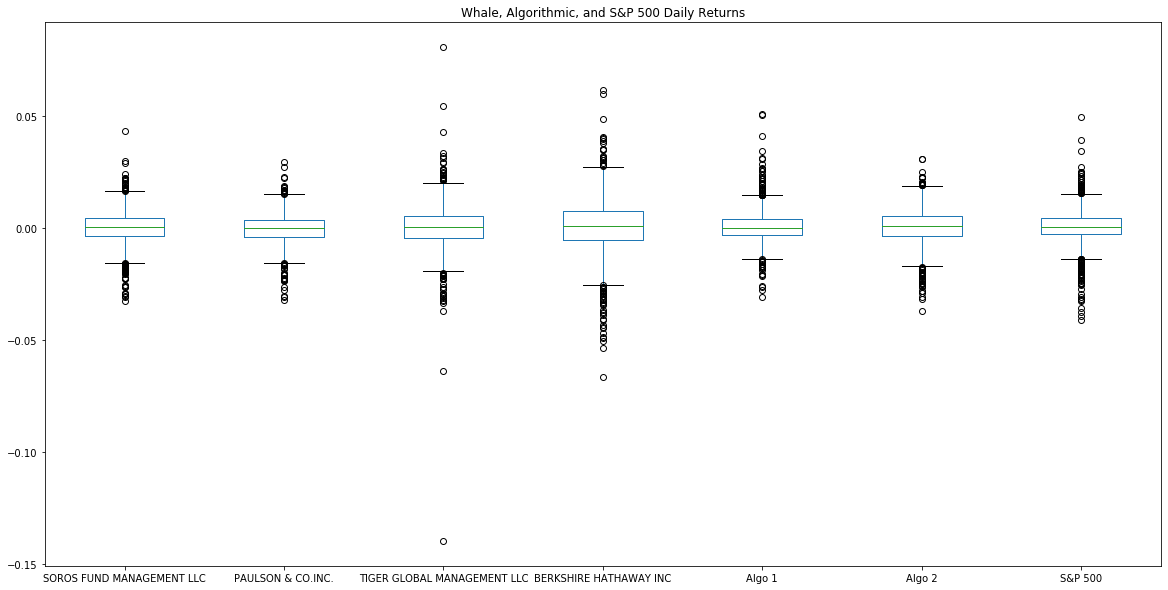

In [46]:
# Box plot to visually show risk
# YOUR CODE HERE
combined_returns.plot.box(figsize=(20, 10), title='Whale, Algorithmic, and S&P 500 Daily Returns')

### Which box has the largest spread? 
TIGER GLOBAL MANAGEMENT LLC  

### Which has the smallest spread? 
PAULSON & CO.INC

In [47]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [48]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
print(daily_std > combined_returns['S&P 500'].std()) 

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool


In [49]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

### Which portfolios are riskier than the S&P 500?
TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC        

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

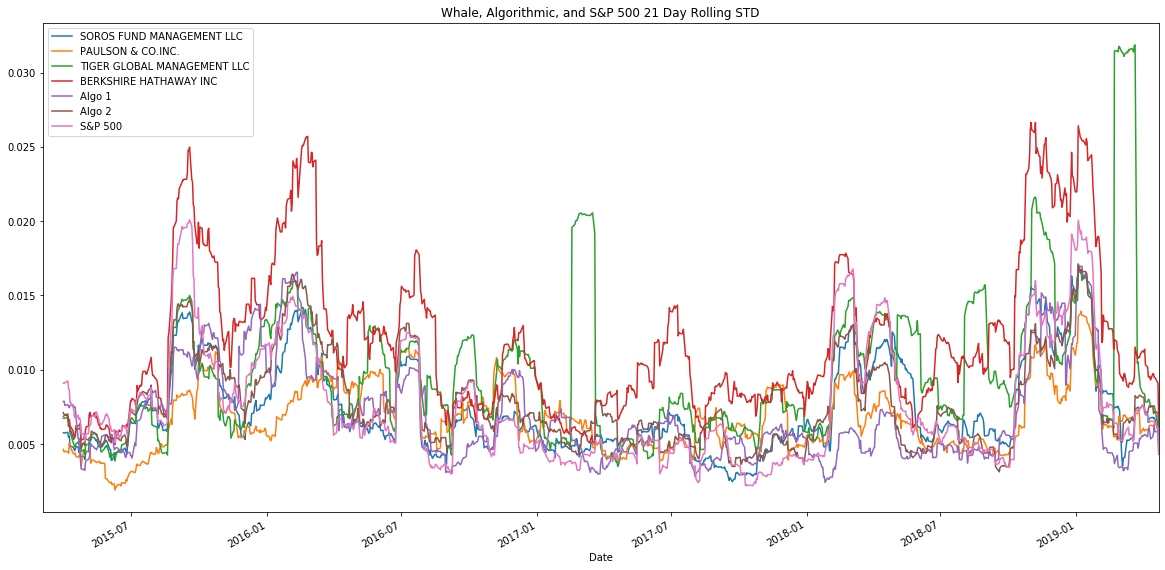

In [50]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
combined_returns.rolling(window=21).std().plot(figsize=(20, 10), title='Whale, Algorithmic, and S&P 500 21 Day Rolling STD')

In [51]:
# Correlation
# YOUR CODE HERE
correlation = combined_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


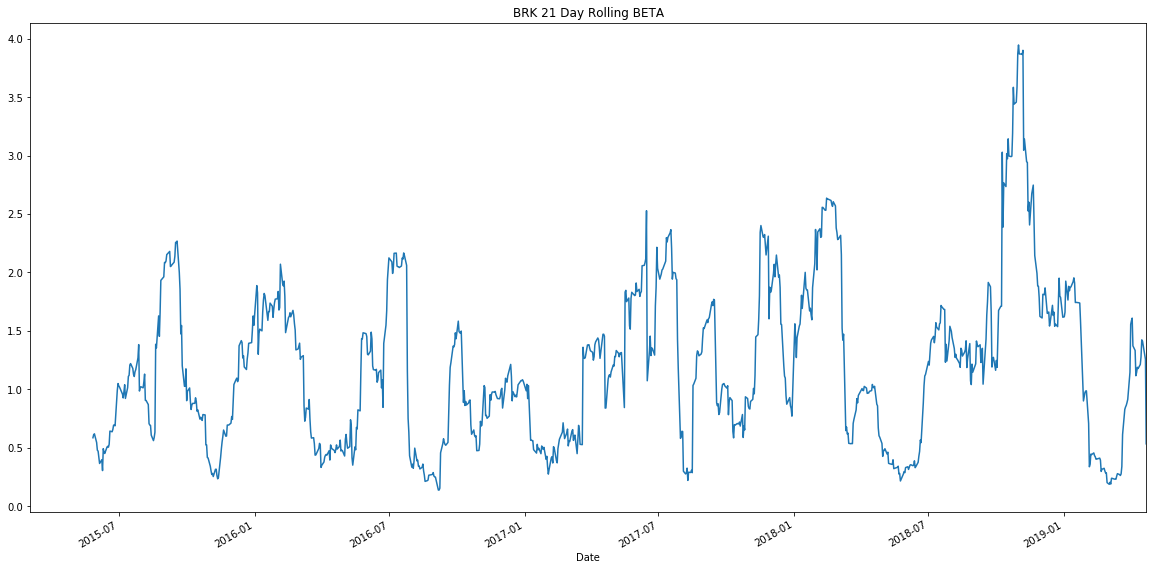

In [52]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE
rolling_brk_covariance = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(combined_returns['S&P 500'])
rolling_sp500_var = combined_returns['S&P 500'].rolling(window=60).var()
rolling_brk_beta = rolling_brk_covariance / rolling_sp500_var
#rolling_brk_beta
#rolling_brk_covariance
#rolling_sp500_var
rolling_brk_beta.plot(figsize=(20, 10), title='BRK 21 Day Rolling BETA')

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

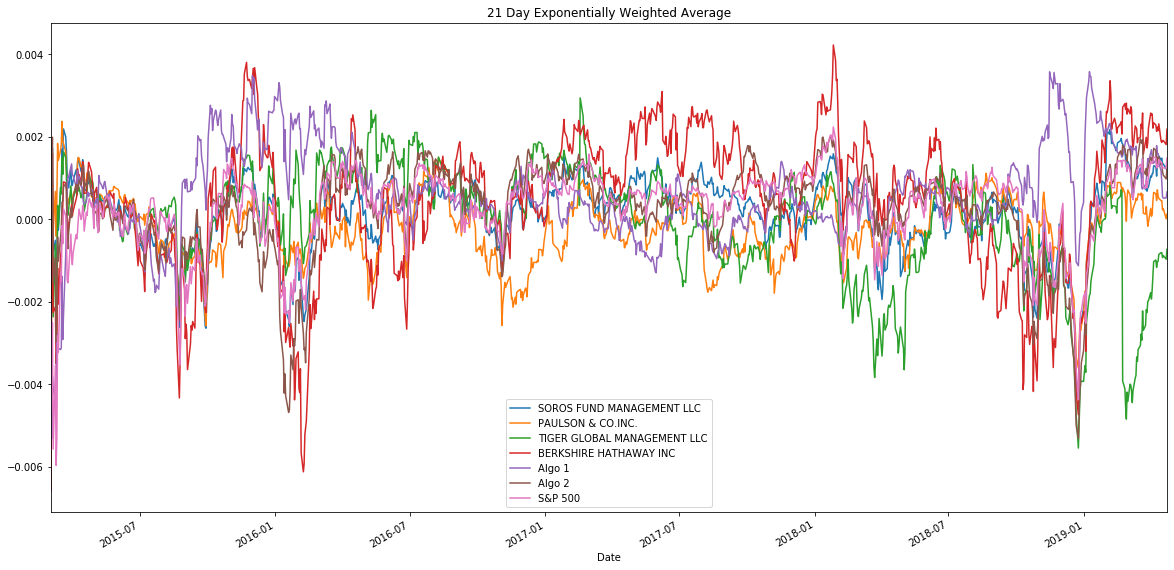

In [53]:
# (OPTIONAL) YOUR CODE HERE
combined_returns.ewm(halflife=21,adjust=True).mean().plot(figsize=(20, 10), title="21 Day Exponentially Weighted Average")

### Does risk increase for each of the portfolios at the same time risk increases in the S&P?
Yes the risk for each of the porfolios generally moves up with the S&P with Tiger and Bershire making larger movements than the other portfolios.


### Construct a correlation table for the algorithmic, whale, and S&P 500 returns. 
SOROS FUND MANAGEMENT LLC and Algo 2.


### Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
BERKSHIRE HATHAWAY INC - Yes the portfolio is very sensitive to movements in the S&P with a beta frequently above one and periodically spiking as high as 4.

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [54]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (combined_returns.mean() *252) / (combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

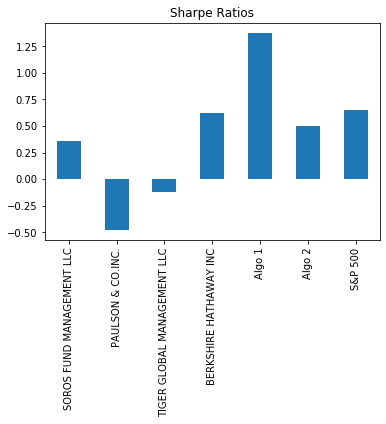

In [55]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algo 1 outperforms all other portfolios. 

Algo 2 outperforms SOROS FUND MANAGEMENT LLC, PAULSON & CO.INC. and TIGER GLOBAL MANAGEMENT LLC.

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [56]:
# Read the first stock
# YOUR CODE HERE
goog_historical_csv = Path("../Resources/goog_historical.csv")
goog_historical = pd.read_csv(goog_historical_csv, index_col="Trade DATE",parse_dates=True, infer_datetime_format=True)
goog_historical.sort_index(inplace=True)
goog_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [58]:
# Read the second stock
# YOUR CODE HERE
aapl_historical_csv = Path("../Resources/aapl_historical.csv")
aapl_historical = pd.read_csv(aapl_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_historical.sort_index(inplace=True)
aapl_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [59]:
# Read the third stock
# YOUR CODE HERE
cost_historical_csv = Path("../Resources/cost_historical.csv")
cost_historical = pd.read_csv(cost_historical_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_historical.sort_index(inplace=True)
cost_historical.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [60]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
all_stocks = pd.concat([goog_historical, aapl_historical, cost_historical], axis='rows', join='inner')
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [61]:
# Reset the index
# YOUR CODE HERE
all_stocks.reset_index()
all_stocks.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [62]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
# YOUR CODE HERE
all_stocks = pd.concat([goog_historical, aapl_historical, cost_historical], axis='columns', join='inner')
all_stocks = all_stocks.drop(columns="Symbol")
all_stocks.sort_index(axis=0, level=None, ascending=True, inplace=True)
all_stocks.columns = ['GOOG','AAPL','COST']
all_stocks.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [63]:
# Drop Nulls
# YOUR CODE HERE
all_returns = all_stocks.pct_change().dropna()
all_returns = all_returns[['AAPL','COST','GOOG']]
all_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [65]:
# YOUR CODE HERE
portfolio = pd.concat([combined_returns,portfolio_returns],axis='columns', join='inner').dropna()
portfolio = portfolio.rename(columns={0: 'Custom'})
portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [66]:
# Only compare dates where the new, custom portfolio has dates
# YOUR CODE HERE
portfolio.shape

(237, 8)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [67]:
# Risk
# YOUR CODE HERE
portfolio_annualized_std = portfolio.std() * np.sqrt(252)
portfolio_annualized_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

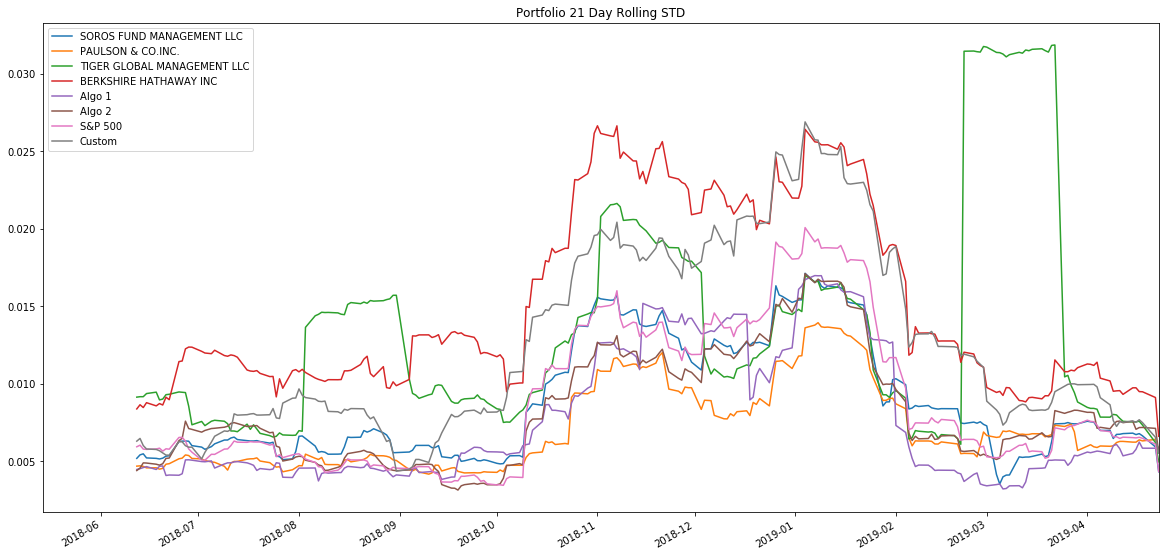

In [68]:
# Rolling
# YOUR CODE HERE
portfolio.rolling(window=21).std().plot(figsize=(20, 10), title='Portfolio 21 Day Rolling STD')

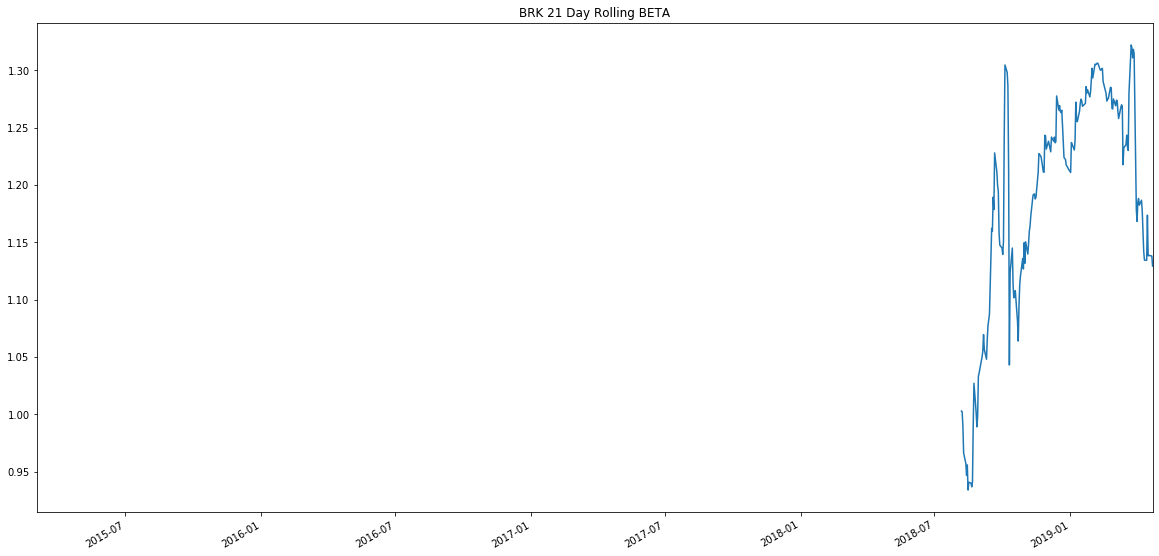

In [69]:
# Beta
# YOUR CODE HERE
rolling_cust_covariance = portfolio["Custom"].rolling(window=60).cov(combined_returns['S&P 500'])
rolling_cust_beta = rolling_cust_covariance / rolling_sp500_var
#rolling_brk_beta
#rolling_brk_covariance
#rolling_sp500_var
rolling_cust_beta.plot(figsize=(20, 10), title='BRK 21 Day Rolling BETA')

In [70]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE
portfolio_sharpe_ratios = (portfolio.mean() *252) / portfolio_annualized_std
portfolio_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

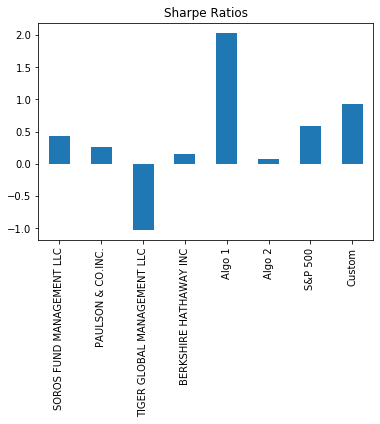

In [71]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
portfolio_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio fair?

Custom outperforms all other portfolios save for Algo 1.

## Include correlation analysis to determine which stocks (if any) are correlated

In [79]:
# YOUR CODE HERE
portfolio_correlation = portfolio.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000
